Installing essential libraries

In [6]:
# Importing necessary libraries
import pandas as pd                  # Import pandas for data manipulation and analysis
import numpy as np                   # Import numpy for numerical operations
import matplotlib.pyplot as plt      # Import matplotlib for data visualization
import seaborn as sns                # Import seaborn for statistical data visualization
from sklearn.impute import SimpleImputer   # Import SimpleImputer for handling missing values
from sklearn.preprocessing import OneHotEncoder   # Import OneHotEncoder for one-hot encoding categorical features
from sklearn.compose import ColumnTransformer    # Import ColumnTransformer for column transformations
from sklearn.model_selection import train_test_split   # Import train_test_split for splitting the dataset into train and test sets
from sklearn.model_selection import GridSearchCV       # Import GridSearchCV for hyperparameter tuning using grid search
from sklearn.linear_model import LinearRegression     # Import LinearRegression for linear regression modeling
from sklearn.metrics import mean_squared_error       # Import mean_squared_error for evaluating regression models
from sklearn.tree import DecisionTreeRegressor       # Import DecisionTreeRegressor for decision tree regression modeling
from sklearn.preprocessing import LabelEncoder       # Import LabelEncoder for label encoding categorical features
from sklearn.preprocessing import MinMaxScaler       # Import MinMaxScaler for scaling numerical features
from sklearn.metrics import r2_score                # Import r2_score for evaluating regression models (R-squared)
from sklearn.ensemble import ExtraTreesRegressor    # Import ExtraTreesRegressor for extra trees regression modeling
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor for random forest regression modeling
from xgboost import XGBRegressor                     # Import XGBRegressor for XGBoost regression modeling


Importing dataset

In [7]:
# Load the Zomato dataset into a Pandas DataFrame
Data = pd.read_csv("zomato_dataset.csv")

In [8]:
# Randomly sample 100 rows from the DataFrame 'Data'
Data.sample(100)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
41203,https://www.zomato.com/bangalore/china-on-my-p...,"95, Opposite Vydehi Hospital, EPIP Area, White...",China On My Plate,No,No,3.0 /5,17,+91 9886069658,Whitefield,Casual Dining,NaN,Chinese,800,"[('Rated 1.0', 'RATED\n quantity is 40 percen...",[],Delivery,Marathahalli
49705,https://www.zomato.com/bangalore/vegigate-sarj...,"Opposite IOC Petrol Pump, Main Road, Sarjapur ...",VegiGate,No,No,NaN,0,+91 7829222998,Sarjapur Road,"Cafe, Quick Bites",NaN,"Cafe, Chinese",500,[],[],Dine-out,Sarjapur Road
4680,https://www.zomato.com/bangalore/laddoos-bella...,"Near Ganesh Temple, Bellandur, Bangalore",Laddoos,Yes,No,2.9/5,163,080 42192763,Bellandur,"Quick Bites, Sweet Shop","Paratha, Samosa, Chole Bhature, Pav Bhaji, Kac...","North Indian, Street Food, Mithai",250,"[('Rated 3.0', ""RATED\n Not sure why the aver...","['Samosa', 'Kachori', 'Sev Puri', 'Samosa Chaa...",Dine-out,Bellandur
32009,https://www.zomato.com/barleyz?context=eyJzZSI...,"2/3, Above Pantaloons, Sony World Junction, 80...",Barleyz,No,No,3.7 /5,4652,+91 8880128888,Koramangala 6th Block,"Lounge, Microbrewery","Tandoori Chicken, Fish Chilli, Cocktails, Pizz...","North Indian, Continental, Chinese","2,000","[('Rated 3.0', 'RATED\n The place had a great...",[],Drinks & nightlife,Koramangala 5th Block
16531,https://www.zomato.com/bangalore/ibaco-hsr?con...,"1504, 19th Main Road, Near TVS Kubera Motors, ...",Ibaco,Yes,No,4.0/5,59,+91 9886697746\r\n+91 8867747478,HSR,Dessert Parlor,NaN,Desserts,300,"[('Rated 4.0', 'RATED\n A new concept of eati...",[],Delivery,HSR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44021,https://www.zomato.com/bangalore/sumadhura-foo...,"229, NTI Layout, Rajiiv Gandhi Nagar, Opposite...",Sumadhura Foods,Yes,No,3.5 /5,108,+91 7975125427,Sahakara Nagar,Quick Bites,NaN,"North Indian, Fast Food",300,"[('Rated 4.0', 'RATED\n Had their biryani and...","['Paneer Chilli', 'Paneer Chilli', 'Baby Corn ...",Delivery,New BEL Road
33911,https://www.zomato.com/bangalore/shanghai-time...,"11, 80 Feet Road, Opposite Indian Oil Petrol P...",Shanghai Times,No,No,2.8 /5,13,+91 9148078240,Koramangala 6th Block,Quick Bites,NaN,"Chinese, Momos",500,"[('Rated 2.0', 'RATED\n The worst fried tice ...",[],Dine-out,Koramangala 6th Block
33964,https://www.zomato.com/bangalore/bistro-clayto...,"11, 80 Feet Road, Next to SBI, Koramangala 1st...",Bistro Claytopia,Yes,Yes,4.1 /5,1855,080 43759392\n+91 9834934359,Koramangala 1st Block,Cafe,"Burgers, Coffee, Cappuccino, Barbeque Burger, ...","Cafe, American, Italian, Burger",600,"[('Rated 4.0', 'RATED\n I love this place for...",[],Dine-out,Koramangala 6th Block
1475,https://www.zomato.com/bangalore/biryani-rooh-...,"9, 1st Floor, SBI Building, New DLF New Town, ...",Biryani Rooh-e-Khaas,Yes,No,NEW,0,+91 8095913131,Bannerghatta Road,Quick Bites,NaN,"Biryani, Mughlai",400,[],[],Delivery,Bannerghatta Road


In [9]:
# Generate descriptive statistics for numerical columns in the DataFrame 'Data'
Data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [10]:
# Display concise summary information about the DataFrame 'Data'
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [11]:
# Remove unnecessary columns from the DataFrame 'Data'
# The columns 'url', 'phone', 'reviews_list', 'menu_item', and 'dish_liked' are dropped
# inplace=True ensures that the changes are made to the original DataFrame 'Data' without returning a new DataFrame
Data.drop(columns=['url','phone','reviews_list','menu_item','dish_liked'], inplace=True)

In [12]:
Data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [13]:
# Check for missing values and duplicated rows in the DataFrame 'Data'
# 'Data.isna().sum()' calculates the number of missing values (NaN) in each column of the DataFrame
# 'print(Data.isna().sum())' prints the total count of missing values for each column
# This helps in identifying columns with missing data, which may need to be handled before analysis or modeling

# 'Data.duplicated().sum()' calculates the number of duplicated rows in the DataFrame
# 'print(Data.duplicated().sum())' prints the total count of duplicated rows
# This helps in identifying and removing duplicate rows, if necessary, to ensure data integrity and accuracy

print(Data.isna().sum())
print(Data.duplicated().sum())

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64
85


In [14]:
# Check for occurrences of the string 'NEW' in the DataFrame 'Data'
# 'Data.isin(['NEW']).sum()' calculates the number of occurrences of 'NEW' in each column of the DataFrame
# 'print(Data.isin(['NEW']).sum())' prints the count of occurrences of 'NEW' for each column

# Replace occurrences of the string 'NEW' with NaN (missing value) in the DataFrame 'Data'
# 'Data.replace('NEW', np.nan, inplace=True)' replaces all occurrences of 'NEW' with NaN in the DataFrame
# This is typically done to standardize missing values and ensure consistency in data representation

# After replacing 'NEW' with NaN, recheck for occurrences of 'NEW' in the DataFrame
# 'print(Data.isin(['NEW']).sum())' is used again to verify that there are no occurrences of 'NEW' after replacement

print(Data.isin(['NEW']).sum())
Data.replace('NEW', np.nan, inplace=True)
print(Data.isin(['NEW']).sum())

address                           0
name                              0
online_order                      0
book_table                        0
rate                           2208
votes                             0
location                          0
rest_type                         0
cuisines                          0
approx_cost(for two people)       0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64


In [15]:
# Get unique values in the 'rate' column of the DataFrame 'Data'
# 'Data['rate'].unique()' returns an array containing all unique values in the 'rate' column
# This is useful for understanding the different rating categories or formats present in the data

Data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
# Check for occurrences of the string 'NEW' in the DataFrame 'Data'
# 'Data.isin(['NEW']).sum()' calculates the number of occurrences of 'NEW' in each column of the DataFrame
# 'print(Data.isin(['NEW']).sum())' prints the count of occurrences of 'NEW' for each column

# Replace occurrences of the string 'NEW' with NaN (missing value) in the DataFrame 'Data'
# 'Data.replace('NEW', np.nan, inplace=True)' replaces all occurrences of 'NEW' with NaN in the DataFrame
# This replacement is done to standardize missing values and ensure data consistency

# After replacing 'NEW' with NaN, recheck for occurrences of 'NEW' in the DataFrame
# 'print(Data.isin(['NEW']).sum())' is used again to verify that there are no occurrences of 'NEW' after replacement

def rate_clean(value):
    if (value =='NEW' or value =='-'):
        return np.nan
    else:
        value = str(value).replace('/5','')
        return float(value)

In [17]:
# Display the data types of each column in the DataFrame 'Data'
# 'Data.dtypes' returns a Series containing the data type of each column
# This information is useful for understanding how the data is stored and processed

Data.dtypes

address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
rest_type                      object
cuisines                       object
approx_cost(for two people)    object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [18]:
Data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [19]:
# This line of code applies the function 'rate_clean' to the 'rate' column of the DataFrame 'Data'
# and assigns the result back to the 'rate' column.
Data['rate']= Data['rate'].apply(rate_clean)

In [20]:
# This line of code fills missing values in the 'rate' column of the DataFrame 'Data' 
# with the most frequent value in that column.
Data["rate"] = Data["rate"].fillna(Data["rate"].mode()[0])

In [21]:
# This line of code returns an array containing all the unique values present in the 'rate' column of the DataFrame 'Data'.
Data['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [22]:
# This line of code selects columns from the DataFrame 'Data' that have data type 'object'.
Data.select_dtypes(include = 'object')

,address,name,online_order,book_table,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [23]:
# This line of code renames the column "approx_cost(for two people)" to "Cost2plate" 
# and the column "listed_in(type)" to "Type" in the DataFrame 'Data'.
# It uses the 'rename' function with a dictionary mapping old column names to new column names.
# The 'inplace=True' parameter ensures that the changes are made directly to the DataFrame 'Data'.
Data.rename(columns={"approx_cost(for two people)": "Cost2plate", "listed_in(type)": "Type"}, inplace=True)

# This line of code renames the column "listed_in(city)" to "city" 
# and the column "listed_in(type)" to "Type" in the DataFrame 'Data'.
# It follows the same process as the previous line, using the 'rename' function with a dictionary.
# The 'inplace=True' parameter ensures that the changes are made directly to the DataFrame 'Data'.
Data.rename(columns={"listed_in(city)": "city", "listed_in(type)": "Type"}, inplace=True)

# This line of code displays the first few rows of the DataFrame 'Data' to verify the changes.
Data.head()


,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [24]:
# This line of code selects columns from the DataFrame 'Data' that have data type 'object'
# and assigns them to the variable 'cols'.
cols = Data.select_dtypes(include='object')


In [25]:
# Iterate over each column in the DataFrame 'Data' that contains data type 'object'
for column in cols:
    # Get unique values in the current column
    unique_values = Data[column].unique()
    
    # Calculate the count of unique values
    unique_vals_count = len(unique_values)
    
    # Print the number of unique values and the unique values themselves for the current column
    print(f'Number of unique values in {column}: {unique_vals_count}')
    print(f'Unique values in {column}: {unique_values}')
    print('----------------------------------------')


Number of unique values in address: 11495
Unique values in address: ['942, 21st Main Road, 2nd Stage, Banashankari, Bangalore'
 '2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Bangalore'
 '1112, Next to KIMS Medical College, 17th Cross, 2nd Stage, Banashankari, Bangalore'
 ...
 'Cessna Business Park, Sarjapur Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x96 Marathahalli Outer Ring Road, Kadubeesanahalli, Bellandur Post, Bengaluru, Karnataka'
 '44, Kodigehalli to Hoodi Main Road, Mahadevapura Post, KR Puram, Bangalore'
 '139/C1, Next To GR Tech Park, Pattandur Agrahara, ITPL, Main Road, Whitefield, Bangalore']
----------------------------------------
Number of unique values in name: 8792
Unique values in name: ['Jalsa' 'Spice Elephant' 'San Churro Cafe' ... 'Nawabs Empire'
 'SeeYa Restaurant'
 'Plunge - Sheraton Grand Bengaluru White

<Axes: xlabel='rest_type'>

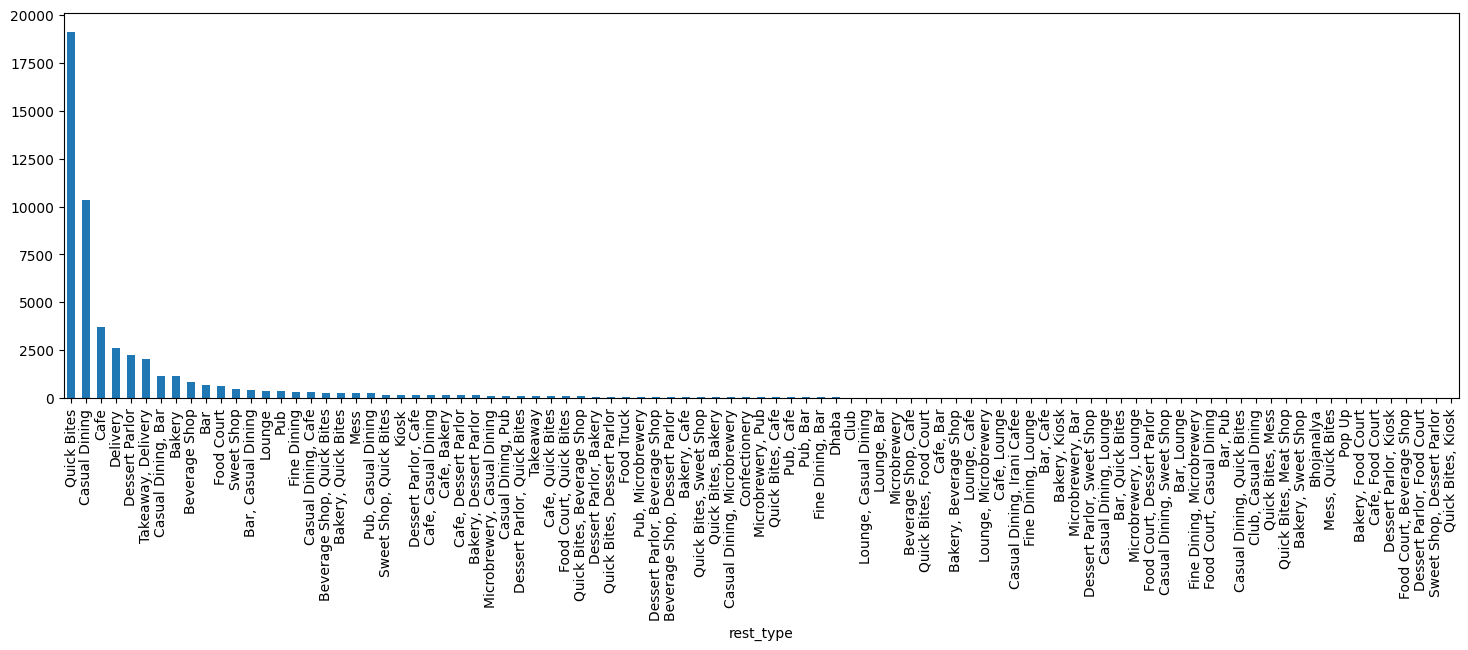

In [26]:
# This line of code calculates the frequency of each unique value in the 'rest_type' column of the DataFrame 'Data', 
# then creates a bar plot to visualize the distribution of these frequencies.
# The 'value_counts()' function counts the occurrences of each unique value, and 'plot(kind='bar')' creates a bar plot.
# The 'figsize=(18,5)' parameter specifies the dimensions of the plot, with a width of 18 inches and a height of 5 inches.
Data['rest_type'].value_counts().plot(kind='bar', figsize=(18,5))

In [27]:
pd.set_option('display.min_rows', None)

In [28]:
Data['rest_type'].value_counts()

rest_type
Quick Bites                    19132
Casual Dining                  10330
Cafe                            3732
Delivery                        2604
Dessert Parlor                  2263
Takeaway, Delivery              2037
Casual Dining, Bar              1154
Bakery                          1141
Beverage Shop                    867
Bar                              697
Food Court                       624
Sweet Shop                       468
Bar, Casual Dining               425
Lounge                           396
Pub                              357
Fine Dining                      346
Casual Dining, Cafe              319
Beverage Shop, Quick Bites       298
Bakery, Quick Bites              289
Mess                             267
Pub, Casual Dining               255
Sweet Shop, Quick Bites          178
Kiosk                            176
Dessert Parlor, Cafe             175
Cafe, Casual Dining              173
Cafe, Bakery                     164
Cafe, Dessert Parlor        

In [29]:
# This line of code creates a boolean Series where each value indicates whether the frequency of each unique value
# in the 'rest_type' column of the DataFrame 'Data' is less than 1000.
# The expression 'Data['rest_type'].value_counts() < 1000' returns a Series of boolean values.
rest_type_others = Data['rest_type'].value_counts() < 1000
rest_type_others


rest_type
Quick Bites                    False
Casual Dining                  False
Cafe                           False
Delivery                       False
Dessert Parlor                 False
Takeaway, Delivery             False
Casual Dining, Bar             False
Bakery                         False
Beverage Shop                   True
Bar                             True
Food Court                      True
Sweet Shop                      True
Bar, Casual Dining              True
Lounge                          True
Pub                             True
Fine Dining                     True
Casual Dining, Cafe             True
Beverage Shop, Quick Bites      True
Bakery, Quick Bites             True
Mess                            True
Pub, Casual Dining              True
Sweet Shop, Quick Bites         True
Kiosk                           True
Dessert Parlor, Cafe            True
Cafe, Casual Dining             True
Cafe, Bakery                    True
Cafe, Dessert Parlor        

In [30]:
# This line of code filters the frequency counts of restaurant types in the 'rest_type' column of the DataFrame 'Data'
# to only include those with frequencies less than 1000. It uses the boolean Series 'rest_type_others' to filter.
# The expression 'Data['rest_type'].value_counts()[rest_type_others]' selects only the counts where 'rest_type_others' is True.
rest_type_less_than_10000 = Data['rest_type'].value_counts()[rest_type_others]


In [31]:
# This is a function definition named 'club_rest_type', which takes a single parameter 'value'.
def club_rest_type(value):
    # This function checks if the given 'value' is present in the 'rest_type_less_than_10000' Series.
    if value in rest_type_less_than_10000:
        # If the 'value' is present in the 'rest_type_less_than_10000' Series, it returns 'Other'.
        return 'Other'
    else:
        # If the 'value' is not present in the 'rest_type_less_than_10000' Series, it returns the original 'value'.
        return value

In [32]:
# This line of code applies the function 'club_rest_type' to each value in the 'rest_type' column of the DataFrame 'Data'.
# The 'apply' function is used to apply a function along the axis of a DataFrame or Series.
# In this case, 'club_rest_type' is applied to each value in the 'rest_type' column.
Data['rest_type'] = Data['rest_type'].apply(club_rest_type)


In [33]:
Data['rest_type'].value_counts()

rest_type
Quick Bites           19132
Casual Dining         10330
Other                  9097
Cafe                   3732
Delivery               2604
Dessert Parlor         2263
Takeaway, Delivery     2037
Casual Dining, Bar     1154
Bakery                 1141
Name: count, dtype: int64

In [34]:
# This line of code calculates whether the frequency of each unique value in the 'location' column of the DataFrame 'Data'
# is less than 1000, resulting in a boolean Series.
# The 'value_counts()' function counts the occurrences of each unique value,
# and '<1000' checks if the count is less than 1000, resulting in True or False for each location.
location_other = Data['location'].value_counts() < 1000

In [35]:
# This line of code filters the frequency counts of locations in the 'location' column of the DataFrame 'Data'
# to only include those with frequencies less than 1000. It uses the boolean Series 'location_other' to filter.
# The expression 'Data['location'].value_counts()[location_other]' selects only the counts where 'location_other' is True.
location_less_than_1000 = Data['location'].value_counts()[location_other]

In [36]:
# This is a function definition named 'club_location', which takes a single parameter 'value'.
def club_location(value):
    # This function checks if the given 'value' is present in the 'location_less_than_1000' Series.
    if value in location_less_than_1000:
        # If the 'value' is present in the 'location_less_than_1000' Series, it returns 'Other'.
        return 'Other'
    else:
        # If the 'value' is not present in the 'location_less_than_1000' Series, it returns the original 'value'.
        return value


In [37]:
# This line of code applies the function 'club_location' to each value in the 'location' column of the DataFrame 'Data'.
# The 'apply' function is used to apply a function along the axis of a DataFrame or Series.
# In this case, 'club_location' is applied to each value in the 'location' column.
Data['location'] = Data['location'].apply(club_location)


In [38]:
Data['location'].value_counts()

location
Other                    19239
BTM                       5124
HSR                       2523
Koramangala 5th Block     2504
JP Nagar                  2235
Whitefield                2144
Indiranagar               2083
Jayanagar                 1926
Marathahalli              1846
Bannerghatta Road         1630
Bellandur                 1286
Electronic City           1258
Koramangala 1st Block     1238
Brigade Road              1218
Koramangala 7th Block     1181
Koramangala 6th Block     1156
Sarjapur Road             1065
Ulsoor                    1023
Koramangala 4th Block     1017
Name: count, dtype: int64

In [39]:
Data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Other,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Other,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Other,Other,"Cafe, Mexican, Italian",800,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Other,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Other,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [40]:
Data['cuisines'].value_counts()

cuisines
North Indian                                                   2913
North Indian, Chinese                                          2385
South Indian                                                   1828
Biryani                                                         918
Bakery, Desserts                                                911
Fast Food                                                       803
Desserts                                                        766
Cafe                                                            756
South Indian, North Indian, Chinese                             726
Bakery                                                          651
Chinese                                                         556
Ice Cream, Desserts                                             417
Chinese, North Indian                                           415
Mithai, Street Food                                             372
Desserts, Ice Cream                    

In [41]:
# This line of code calculates whether the frequency of each unique value in the 'cuisines' column of the DataFrame 'Data'
# is less than 300, resulting in a boolean Series.
# The 'value_counts()' function counts the occurrences of each unique value,
# and '<300' checks if the count is less than 300, resulting in True or False for each cuisine.
cuisines_other = Data['cuisines'].value_counts() < 300

In [42]:
# This line of code filters the frequency counts of cuisines in the 'cuisines' column of the DataFrame 'Data'
# to only include those with frequencies less than 300. It uses the boolean Series 'cuisines_other' to filter.
# The expression 'Data['cuisines'].value_counts()[cuisines_other]' selects only the counts where 'cuisines_other' is True.
cuisines_less = Data['cuisines'].value_counts()[cuisines_other]

In [43]:
# This is a function definition named 'club_cuisenes', which takes a single parameter 'value'.
def club_cuisenes(value):
    # This function checks if the given 'value' is present in the 'cuisines_less' Series.
    if value in cuisines_less:
        # If the 'value' is present in the 'cuisines_less' Series, it returns 'other'.
        return 'other'
    else:
        # If the 'value' is not present in the 'cuisines_less' Series, it returns the original 'value'.
        return value

In [44]:
# This line of code applies the function 'club_cuisenes' to each value in the 'cuisines' column of the DataFrame 'Data'.
# The 'apply' function is used to apply a function along the axis of a DataFrame or Series.
# In this case, 'club_cuisenes' is applied to each value in the 'cuisines' column.
Data['cuisines'] = Data['cuisines'].apply(club_cuisenes)

In [45]:
Data['cuisines'].value_counts()

cuisines
other                                  35257
North Indian                            2913
North Indian, Chinese                   2385
South Indian                            1828
Biryani                                  918
Bakery, Desserts                         911
Fast Food                                803
Desserts                                 766
Cafe                                     756
South Indian, North Indian, Chinese      726
Bakery                                   651
Chinese                                  556
Ice Cream, Desserts                      417
Chinese, North Indian                    415
Mithai, Street Food                      372
Desserts, Ice Cream                      354
North Indian, Chinese, Biryani           352
South Indian, North Indian               343
North Indian, South Indian               343
North Indian, South Indian, Chinese      305
Beverages                                301
Name: count, dtype: int64

In [46]:
# This line of code converts the data type of the 'Cost2plate' column in the DataFrame 'Data' to string.
# The 'astype()' function is used to convert the data type of a Series to the specified type.
# In this case, 'str' is used as the argument to convert the data type to string.
Data['Cost2plate'] = Data['Cost2plate'].astype(str)

In [47]:
# This line of code replaces all occurrences of ',' in the 'Cost2plate' column of the DataFrame 'Data' with a space.
# The 'str.replace()' function is used to replace a specified substring with another substring in a Series with string values.
Data['Cost2plate'] = Data['Cost2plate'].str.replace(","," ")

# This line of code converts the 'Cost2plate' column to object type.
# The 'astype()' function is used to convert the data type of a Series to the specified type.
# In this case, 'object' is used as the argument to convert the data type to object.
Data['Cost2plate'].astype(object)

# This line of code replaces all occurrences of 'nan' (string) in the 'Cost2plate' column with actual NaN values.
# The 'replace()' function is used to replace a specified value with another value in a Series or DataFrame.
# 'np.nan' is used to represent a missing value (NaN) in the 'numpy' library.
Data['Cost2plate'].replace('nan', np.nan, inplace=True)


In [48]:
Data['Cost2plate']

0          800
1          800
2          800
3          300
4          600
5          600
6          800
7          600
8          700
9          550
10         500
11         600
12         500
13         450
14         800
15         650
16         800
17         700
18         300
19         400
20         400
21         500
22         900
23         600
24         300
25         600
26         200
27         500
28         550
29         550
         ...  
51687    1 700
51688    1 100
51689    1 000
51690    1 500
51691    1 800
51692    1 000
51693    1 200
51694    1 500
51695    1 600
51696    1 700
51697    1 800
51698    1 200
51699    1 200
51700    1 500
51701    1 400
51702    1 450
51703    1 500
51704    1 500
51705    1 200
51706    1 200
51707    2 000
51708    1 200
51709      800
51710      900
51711      800
51712    1 500
51713      600
51714    2 000
51715    2 500
51716    1 500
Name: Cost2plate, Length: 51717, dtype: object

In [49]:
# This line of code calculates the sum of missing values for each column in the DataFrame 'Data'.
# The 'isna()' function is used to identify missing values (NaN) in the DataFrame,
# and 'sum()' function calculates the sum of missing values for each column.
impute_data = Data.isna().sum()

# This line of code filters the 'impute_data' Series to include only columns with non-zero missing values.
# The expression 'impute_data != 0' creates a boolean mask to select columns with missing values.
impute_data = impute_data[impute_data != 0]

# This line of code prints the filtered 'impute_data' Series, which contains columns with non-zero missing values.
print(impute_data)


location       21
rest_type     227
cuisines       45
Cost2plate    346
dtype: int64


In [51]:
Data['Cost2plate'].dtypes

dtype('O')

In [52]:
# Importing necessary library
from sklearn.impute import SimpleImputer

# Creating an instance of SimpleImputer with strategy='median'
impute = SimpleImputer(strategy='median')

# Converting the 'Cost2plate' column to numeric data type.
# The 'pd.to_numeric()' function converts the specified column to numeric data type.
# The 'errors='coerce'' argument ensures that any invalid parsing will be set as NaN.
Data['Cost2plate'] = pd.to_numeric(Data['Cost2plate'], errors='coerce')

# Reshaping the 'Cost2plate' column to have a single feature (necessary for SimpleImputer)
# The '.values.reshape(-1,1)' reshapes the column into a single feature array with one column.
reshaped_data = Data['Cost2plate'].values.reshape(-1, 1)

# Imputing missing values in the 'Cost2plate' column using the SimpleImputer
# The 'fit_transform()' function fits the imputer to the data and transforms it by replacing missing values with the median.
Data['Cost2plate'] = impute.fit_transform(reshaped_data)


In [53]:
# This line of code calculates the number of missing values in the 'Cost2plate' column of the DataFrame 'Data'.
# The 'isna()' function is used to identify missing values (NaN) in the specified column,
# and 'sum()' function calculates the sum of missing values.
missing_values_count = Data['Cost2plate'].isna().sum()

In [54]:
# This line of code calculates the number of missing values in the 'cuisines' column of the DataFrame 'Data'.
# The 'isna()' function is used to identify missing values (NaN) in the specified column,
# and 'sum()' function calculates the sum of missing values.
missing_values_cuisines = Data['cuisines'].isna().sum()

# This line of code calculates the number of missing values in the 'rest_type' column of the DataFrame 'Data'.
# Similar to the previous line, 'isna()' function is used to identify missing values (NaN) in the specified column,
# and 'sum()' function calculates the sum of missing values.
missing_values_rest_type = Data['rest_type'].isna().sum()

Removing null values - Cuisines and rest_type(Mode type)

In [55]:
# Define a function to calculate the mode of a Series 'x'
def calculate_mode(x):
    # Use the mode() function to calculate the mode of 'x'
    # If the mode is not empty, return the first mode value; otherwise, return None
    return x.mode().iloc[0] if not x.mode().empty else None

# Fill missing values in the 'rest_type' column based on the mode of 'rest_type' grouped by 'Cost2plate'
# The 'fillna()' function fills missing values in the specified column using values from a groupby operation.
# The 'transform()' function applies the 'calculate_mode' function to each group.
Data['rest_type'].fillna(Data.groupby('Cost2plate')['rest_type'].transform(calculate_mode), inplace=True)

# Fill missing values in the 'cuisines' column based on the mode of 'cuisines' grouped by 'rest_type'
# Similar to the previous line, 'fillna()' function fills missing values using values from a groupby operation.
# The 'transform()' function applies the 'calculate_mode' function to each group.
Data['cuisines'].fillna(Data.groupby('rest_type')['cuisines'].transform(calculate_mode), inplace=True)

# Print the sum of missing values in each column to verify that all missing values have been filled
print(Data.isna().sum())


address          0
name             0
online_order     0
book_table       0
rate             0
votes            0
location        21
rest_type        0
cuisines         0
Cost2plate       0
Type             0
city             0
dtype: int64


<Axes: >

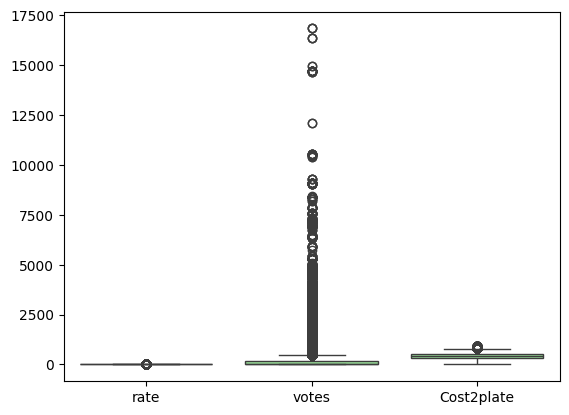

In [56]:
# Using Seaborn to create a boxplot of the DataFrame 'Data'
# The 'boxplot()' function creates a box plot of one or more variables in a DataFrame.
# The 'data' parameter specifies the DataFrame to be plotted.
# The 'color' parameter sets the color of the boxplot.
sns.boxplot(data=Data, color='lightgreen')

In [57]:
from matplotlib.cbook import boxplot_stats
# Using boxplot_stats from matplotlib.cbook to detect outliers in specific columns of the DataFrame 'Data'
# The boxplot_stats function computes several statistics, including outliers, from a given data array.
# We specify the columns of interest (rate, votes, and Cost2plate) using indexing with Data.columns[].
outliers = boxplot_stats(Data[Data.columns[[4,5,9]]])

# Extracting the outliers from the boxplot_stats output and storing them in a DataFrame
# We use pd.DataFrame() to convert the outliers list into a DataFrame.
# We then access the 'fliers' column of the DataFrame to get the outliers.
outliers = pd.DataFrame(outliers)['fliers']

# Filtering out rows in the DataFrame 'Data' where the 'rate' column contains outliers
# We use the '~' operator to negate the condition, keeping only rows where the 'rate' column is not in outliers[0].
Data = Data[~Data['rate'].isin(outliers[0])]

# Filtering out rows in the DataFrame 'Data' where the 'votes' column contains outliers
# Similar to the previous line, we use the '~' operator to negate the condition and keep only valid rows.
Data = Data[~Data['votes'].isin(outliers[1])]

# Dropping rows with missing values in the 'location' column of the DataFrame 'Data'
# The 'dropna()' function removes rows with missing values, and 'subset' parameter specifies the column to consider.
# We set 'inplace=True' to modify the DataFrame 'Data' in place.
Data.dropna(subset=['location'], inplace=True)


<Axes: >

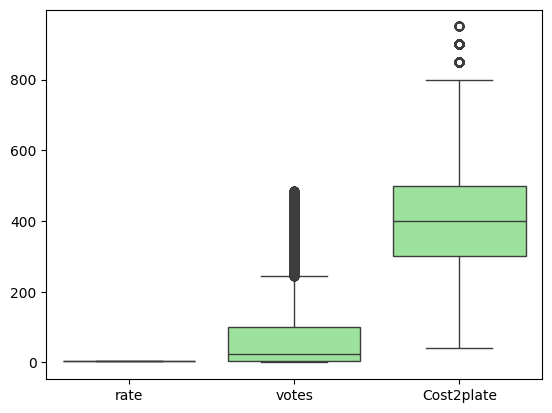

In [58]:
sns.boxplot(data=Data, color='lightgreen')

Data visulization

<Axes: xlabel='online_order', ylabel='count'>

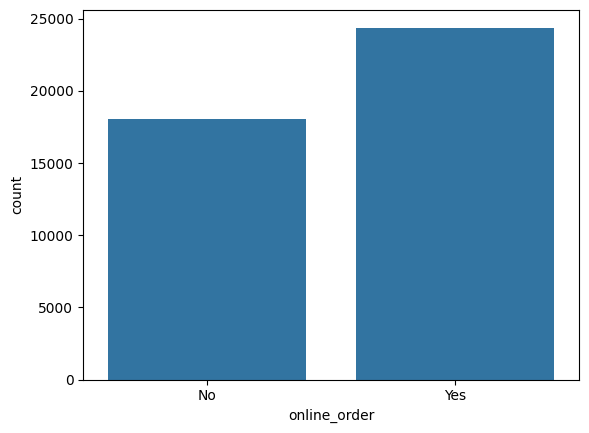

In [59]:
# Creating a countplot to visualize the distribution of online order availability in restaurants
# The 'countplot()' function from Seaborn generates a bar plot to display the frequency of each category.
# We specify the DataFrame 'Data' and use the 'online_order' column as the x-axis variable to represent the data.
sns.countplot(Data, x=Data['online_order'])


(-1.09999996951618,
 1.0999996961660239,
 -1.0999999375523526,
 1.0999998101257846)

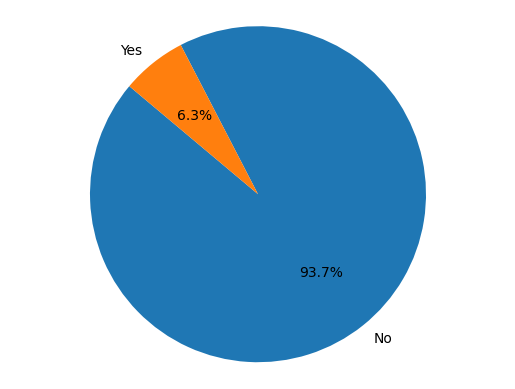

In [60]:
# Extracting the value counts of the 'book_table' column from the DataFrame 'Data'
# The 'value_counts()' function computes the frequency of each unique value in the specified column.
x = Data['book_table'].value_counts()

# Creating a pie chart to visualize the distribution of booking table availability in restaurants
# The 'pie()' function from Matplotlib generates a pie chart.
# We provide the counts (x) as the data, labels as x.index (unique values of 'book_table' column),
# autopct='%1.1f%%' formats the percentages displayed on the chart, and startangle sets the starting angle of the pie chart.
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=140)

# Ensuring the pie chart is circular by setting the aspect ratio of the plot to be equal
plt.axis('equal')


In [61]:
Data['rate'].dtypes

dtype('float64')

<Axes: xlabel='book_table', ylabel='rate'>

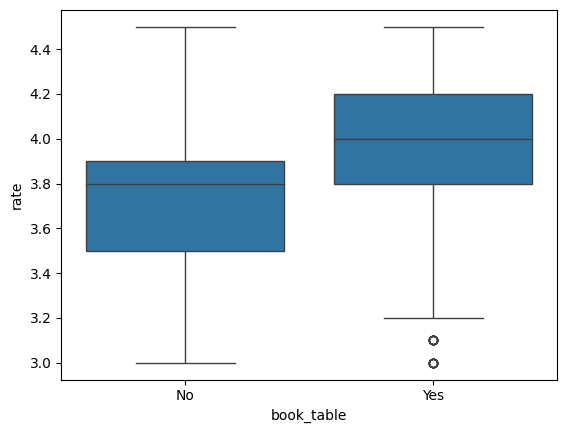

In [62]:
# Creating a boxplot to compare the distribution of ratings ('rate') between restaurants offering and not offering table booking
# The 'boxplot()' function from Seaborn generates a box plot to show the distribution of numerical data ('rate') across 
# categories of a categorical variable ('book_table').
# 'Data' is the DataFrame containing the data, 'book_table' represents the x-axis variable (categories),
# and 'rate' represents the y-axis variable (numerical data).
sns.boxplot(Data, x='book_table', y='rate')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9012\3107395070.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chains, y=chains.index, palette='plasma')


<Axes: xlabel='count', ylabel='name'>

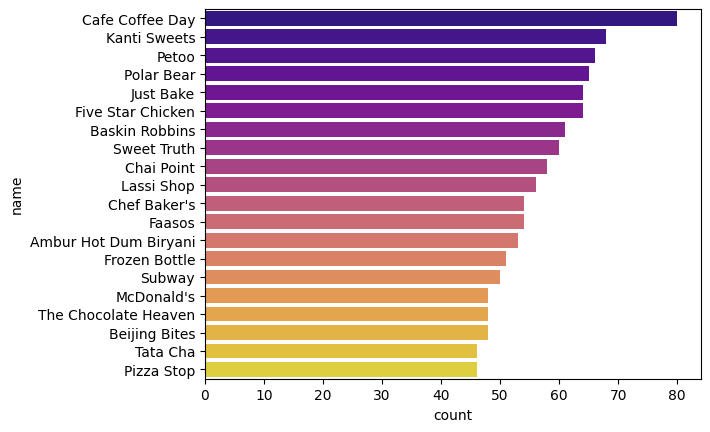

In [105]:
# Extracting the top 20 restaurant chains based on the count of their occurrences in the 'name' column of the DataFrame 'Data'
# The 'value_counts()' function computes the frequency of each unique value in the specified column,
# and [:20] selects the top 20 most frequent restaurant chains.
chains = Data['name'].value_counts()[:20]

# Creating a bar plot to visualize the top 20 restaurant chains and their occurrence counts
# The 'barplot()' function from Seaborn generates a bar plot to show the relationship between a numerical and a categorical variable.
# Here, 'chains' is the numerical variable on the x-axis, representing the occurrence counts of each restaurant chain,
# and 'chains.index' is the categorical variable on the y-axis, representing the names of the restaurant chains.
# The 'palette' parameter sets the color scheme for the plot.
sns.barplot(x=chains, y=chains.index, palette='plasma')


Restaurant type

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9012\4245297603.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  countplot_data.set_xticklabels(countplot_data.get_xticklabels(), rotation=90)


[Text(0.0, 0, '0'),
 Text(5000.0, 0, '5000'),
 Text(10000.0, 0, '10000'),
 Text(15000.0, 0, '15000'),
 Text(20000.0, 0, '20000'),
 Text(25000.0, 0, '25000')]

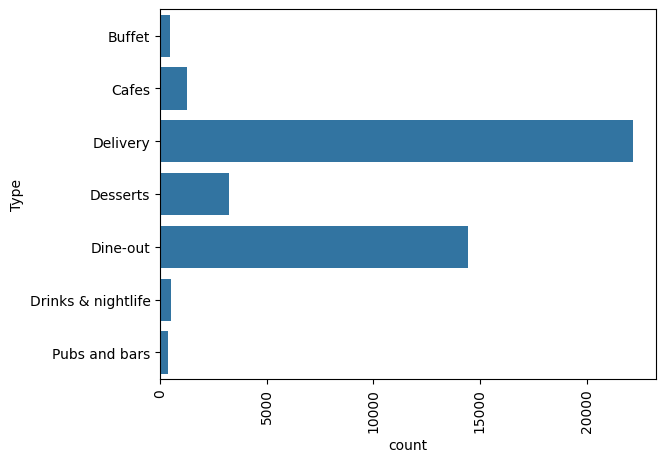

In [64]:
# Creating a countplot to visualize the frequency of each category in the 'Type' column of the DataFrame 'Data'
# The 'countplot()' function from Seaborn generates a bar plot to display the count of observations in each category.
# We specify the 'Type' column of the DataFrame 'Data' as the input to the countplot function.
countplot_data = sns.countplot(Data['Type'])

# Rotating the x-axis labels by 90 degrees for better readability
# The 'set_xticklabels()' function sets the x-axis labels of the countplot.
# We pass the x-axis labels obtained from the countplot as input.
# The 'rotation=90' parameter rotates the x-axis labels by 90 degrees.
countplot_data.set_xticklabels(countplot_data.get_xticklabels(), rotation=90)


Ratings based on location

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Koramangala 4th Block'),
  Text(1, 0, 'Koramangala 5th Block'),
  Text(2, 0, 'Koramangala 7th Block'),
  Text(3, 0, 'Indiranagar'),
  Text(4, 0, 'Jayanagar'),
  Text(5, 0, 'Ulsoor'),
  Text(6, 0, 'Koramangala 6th Block'),
  Text(7, 0, 'Koramangala 1st Block'),
  Text(8, 0, 'JP Nagar'),
  Text(9, 0, 'HSR')])

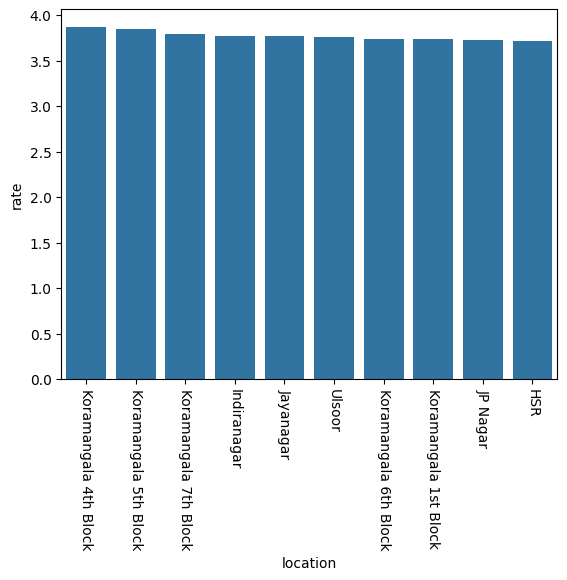

In [65]:
# Calculating the mean rating for each location and selecting the top 10 locations with the highest mean rating
# The 'groupby()' function groups the data by the 'location' column, and 'mean()' calculates the mean rating for each group.
# The result is sorted in descending order based on the mean rating, and the top 10 locations are selected using [0:10].
# The result is stored in the DataFrame 'rateloc'.
rateloc = Data[['location', 'rate']].groupby('location').mean().sort_values('rate', ascending=False)[0:10].reset_index()

# Creating a bar plot to visualize the mean rating for the top 10 locations
# The 'barplot()' function from Seaborn generates a bar plot to display the relationship between two variables.
# We specify the DataFrame 'rateloc' as the data source, 'location' as the x-axis variable, and 'rate' as the y-axis variable.
sns.barplot(data=rateloc, x='location', y='rate')

# Rotating the x-axis labels by 270 degrees for better readability
# The 'plt.xticks()' function sets the x-axis tick labels for the plot.
# We specify the rotation angle '270' to rotate the x-axis labels by 270 degrees.
plt.xticks(rotation=270)

In [66]:
Data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type,city
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Other,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Other,Casual Dining,other,600.0,Buffet,Banashankari
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,Other,Casual Dining,North Indian,600.0,Buffet,Banashankari
6,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Other,Casual Dining,other,800.0,Buffet,Banashankari
8,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0,324,Other,Cafe,other,700.0,Cafes,Banashankari


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'The Onyx - The HHI Select Bengaluru'),
  Text(1, 0, 'Bathinda Dine'),
  Text(2, 0, 'Engine'),
  Text(3, 0, 'Ayda Persian Kitchen'),
  Text(4, 0, 'Pindi Bangalore'),
  Text(5, 0, 'Risalo Pizzeria'),
  Text(6, 0, 'Ulavacharu'),
  Text(7, 0, 'Shakthi Bar and Restaurant'),
  Text(8, 0, 'New Friends'),
  Text(9, 0, 'Hotel Ivy Dew Drops')])

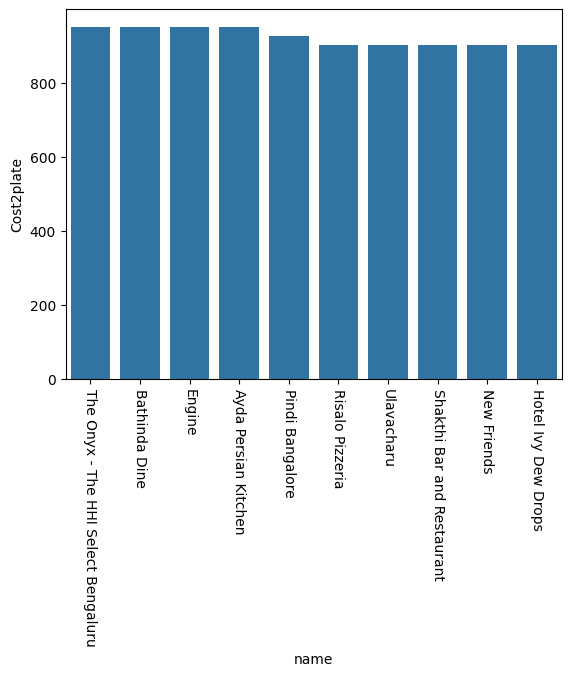

In [67]:
# Calculating the mean cost for each restaurant and selecting the top 10 restaurants with the highest mean cost
# The 'groupby()' function groups the data by the 'name' column, and 'mean()' calculates the mean cost for each group.
# The result is rounded to the nearest integer using 'round()', sorted in descending order based on the mean cost,
# and the top 10 restaurants are selected using [0:10].
# The resulting DataFrame 'restcost' contains the restaurant names and their corresponding mean costs.
restcost = round(Data[['name', 'Cost2plate']].groupby('name').mean(), 0).sort_values('Cost2plate', ascending=False)[0:10].reset_index()

# Creating a bar plot to visualize the mean cost for the top 10 restaurants
# The 'barplot()' function from Seaborn generates a bar plot to display the relationship between two variables.
# We specify the DataFrame 'restcost' as the data source, 'name' as the x-axis variable (restaurant names),
# and 'Cost2plate' as the y-axis variable (mean cost).
sns.barplot(data=restcost, x='name', y='Cost2plate')

# Rotating the x-axis labels by 270 degrees for better readability
# The 'plt.xticks()' function sets the x-axis tick labels for the plot.
# We specify the rotation angle '270' to rotate the x-axis labels by 270 degrees, making them vertical.
plt.xticks(rotation=270)


Relation between cost and rating

<Axes: >

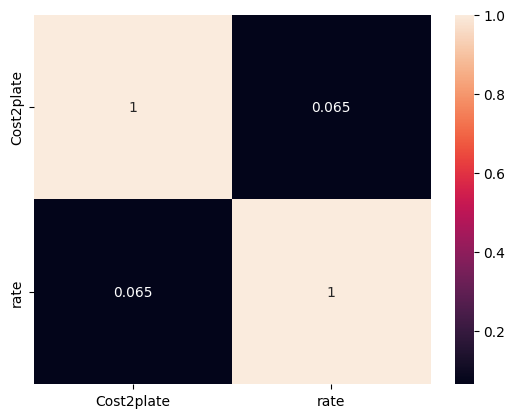

In [68]:
# Creating a heatmap to visualize the correlation between the 'Cost2plate' (average cost for two people) and 'rate' (average rating) columns in the DataFrame 'Data'
# The 'corr()' function computes the correlation coefficients between columns in a DataFrame.
# We select only the 'Cost2plate' and 'rate' columns from the DataFrame 'Data' and calculate their correlation.
# The resulting correlation matrix is passed to the 'heatmap()' function from Seaborn to create a heatmap.
# The 'annot=True' parameter adds annotations (correlation values) to each cell of the heatmap.
sns.heatmap(Data[['Cost2plate', 'rate']].corr(), annot=True)

Number of restaurents in location

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9012\3190964587.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='location', data=df_top_locations, palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Jayanagar'),
  Text(2, 0, 'JP Nagar'),
  Text(3, 0, 'Bannerghatta Road'),
  Text(4, 0, 'BTM'),
  Text(5, 0, 'Electronic City'),
  Text(6, 0, 'HSR'),
  Text(7, 0, 'Marathahalli'),
  Text(8, 0, 'Koramangala 5th Block'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Koramangala 4th Block'),
  Text(11, 0, 'Bellandur'),
  Text(12, 0, 'Sarjapur Road'),
  Text(13, 0, 'Whitefield'),
  Text(14, 0, 'Indiranagar'),
  Text(15, 0, 'Koramangala 1st Block'),
  Text(16, 0, 'Brigade Road'),
  Text(17, 0, 'Ulsoor'),
  Text(18, 0, 'Koramangala 6th Block')])

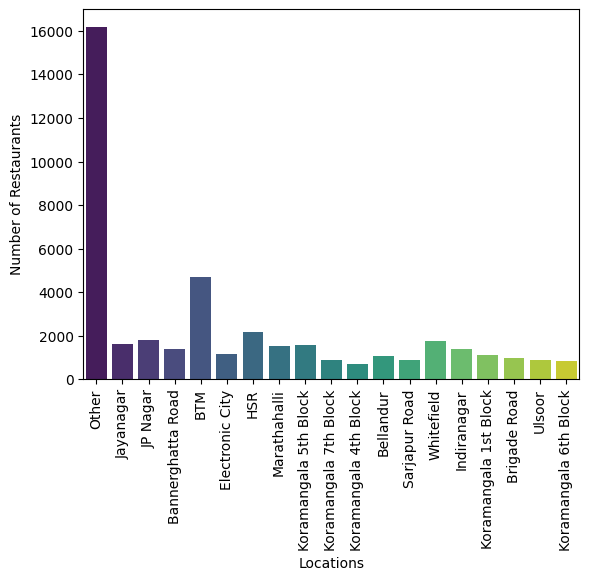

In [69]:
# Extracting the top 20 most frequent locations from the 'location' column of the DataFrame 'Data'
top_locations = Data['location'].value_counts().head(20).index

# Filtering the DataFrame 'Data' to include only rows where the 'location' column values are among the top 20 locations
df_top_locations = Data[Data['location'].isin(top_locations)]

# Creating a countplot to visualize the number of restaurants in each of the top 20 locations
sns.countplot(x='location', data=df_top_locations, palette='viridis')

# Adding labels to the x-axis and y-axis
plt.xlabel('Locations')
plt.ylabel('Number of Restaurants')

# Rotating the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

In [70]:
Data.head(1)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type,city
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Other,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari


In [71]:
# Splitting the values in the 'cuisines' column by comma and converting them into lists of individual cuisine items
Data['cuisines'] = Data['cuisines'].str.split(',')

# Splitting the values in the 'rest_type' column by comma and converting them into lists of individual restaurant types
Data['rest_type'] = Data['rest_type'].str.split(',')

# Counting the number of items in each list of cuisines and updating the 'cuisines' column with the count
# The lambda function calculates the length of each list minus 1 (as the list contains an empty string as the first element after splitting)
Data['cuisines'] = Data['cuisines'].apply(lambda x: len(x) - 1)

# Counting the number of items in each list of restaurant types and updating the 'rest_type' column with the count
# Similar to the 'cuisines' column, the lambda function calculates the length of each list minus 1
Data['rest_type'] = Data['rest_type'].apply(lambda y: len(y) - 1)


In [72]:
# Selecting the features (independent variables) for the machine learning model
# The features include 'online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type', 'cuisines', and 'Type'
X = Data[['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type', 'cuisines', 'Type']]

# Selecting the target variable (dependent variable) for the machine learning model
# The target variable is 'Cost2plate', representing the average cost for two people
# The '.values' attribute converts the target variable into a numpy array for further processing
Y = Data['Cost2plate'].values


Data transformation

In [73]:
# Creating a MinMaxScaler object to scale the features and target variable between 0 and 1
scaler = MinMaxScaler()

# Scaling the 'rate' and 'votes' columns of the feature matrix 'X' using MinMaxScaler
# The '.iloc[:,2:4]' selects columns at index positions 2 and 3 (zero-based indexing) representing 'rate' and 'votes'
# The 'fit_transform()' method of the scaler scales the selected columns in-place and returns the transformed values
X.iloc[:, 2:4] = scaler.fit_transform(X.iloc[:, 2:4])

# Scaling the target variable 'Y' using MinMaxScaler
# Reshaping 'Y' to a 2D array (-1 rows and 1 column) as required by the fit_transform method
# The 'fit_transform()' method of the scaler scales 'Y' and returns the transformed values
Y = scaler.fit_transform(Y.reshape((-1, 1)))


Label encoding

In [74]:
# Creating a LabelEncoder object to encode categorical columns as numerical labels
feature = LabelEncoder()

# Encoding the 'online_order' column from categorical (yes/no) to numerical labels (0/1)
# The '.loc[:, 'online_order']' selects all rows and the 'online_order' column for encoding
# The 'fit_transform()' method of the LabelEncoder fits the encoder to the unique categories in the column and transforms the labels
X.loc[:, 'online_order'] = feature.fit_transform(X.loc[:, 'online_order'])

# Encoding the 'book_table' column from categorical (yes/no) to numerical labels (0/1)
# The '.loc[:, 'book_table']' selects all rows and the 'book_table' column for encoding
# Similar to 'online_order', the 'fit_transform()' method fits the encoder and transforms the labels
X.loc[:, 'book_table'] = feature.fit_transform(X.loc[:, 'book_table'])


One hot encoding

In [75]:
# Creating a new DataFrame 'df' containing only the 'location' and 'Type' columns from the original DataFrame 'Data'
# The double square brackets [['location','Type']] are used to select specific columns and create a new DataFrame.
df = Data[['location', 'Type']]

In [76]:
# Encoding categorical variables using one-hot encoding
# pd.get_dummies() function converts categorical variables into dummy/indicator variables
df_encoded = pd.get_dummies(df)

# Creating a LabelEncoder object to encode categorical variables as numerical labels
le = LabelEncoder()

# Making a copy of the original DataFrame 'df' to avoid modifying it directly
df_encoded = df.copy()  # Make a copy to avoid modifying original DataFrame

# Iterating over each column in the DataFrame 'df'
for col in df:
    # Encoding each categorical column using the LabelEncoder
    # The 'fit_transform()' method fits the encoder to the unique categories in the column and transforms the labels
    df_encoded[col] = le.fit_transform(df[col])


In [77]:
# Dropping original categorical columns from the feature matrix 'X'
# The '.drop()' method is used to remove specified columns along the specified axis (axis=1 for columns)
# This operation removes the 'location' and 'Type' columns from 'X'
X = X.drop(['location', 'Type'], axis=1)

# Concatenating dataset 'X' with the encoded categorical columns
# The pd.concat() function is used to concatenate DataFrames along columns (axis=1)
# This operation combines the modified feature matrix 'X' (without 'location' and 'Type' columns) with the encoded categorical columns
# The result is stored in the DataFrame 'df_encoded'
df_encoded = pd.concat([X, df_encoded[['location', 'Type']]], axis=1)


In [78]:
df_encoded

,online_order,book_table,rate,votes,rest_type,cuisines,location,Type
3,0,0,0.466667,0.181818,0,1,15,0
4,0,0,0.533333,0.342975,0,0,15,0
5,1,0,0.533333,0.590909,0,0,15,0
6,0,0,0.400000,0.016529,0,0,15,0
8,1,0,0.666667,0.669421,0,0,15,1
10,1,0,0.733333,0.830579,0,0,15,1
11,1,1,0.800000,0.309917,0,0,15,1
12,1,1,0.800000,0.338843,0,0,15,1
13,0,0,0.666667,0.876033,0,0,15,1
15,1,0,0.533333,0.185950,0,0,15,1


Fitting data into ML model

In [79]:
# Splitting the data into train and test data:

X_train, X_test, Y_train, Y_test = train_test_split(df_encoded, Y, test_size=0.2)

In [80]:
df_encoded['location'].dtypes

dtype('int32')

In [97]:
#Using Linear Regression:

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)
r2 = r2_score(Y_test, Y_predict)

In [87]:
df_encoded

,online_order,book_table,rate,votes,rest_type,cuisines,location,Type
3,0,0,0.466667,0.181818,0,1,15,0
4,0,0,0.533333,0.342975,0,0,15,0
5,1,0,0.533333,0.590909,0,0,15,0
6,0,0,0.400000,0.016529,0,0,15,0
8,1,0,0.666667,0.669421,0,0,15,1
10,1,0,0.733333,0.830579,0,0,15,1
11,1,1,0.800000,0.309917,0,0,15,1
12,1,1,0.800000,0.338843,0,0,15,1
13,0,0,0.666667,0.876033,0,0,15,1
15,1,0,0.533333,0.185950,0,0,15,1


In [93]:
# Creating an Extra Trees Regressor model object with specified hyperparameters
# 'n_estimators' specifies the number of trees in the forest
# 'verbose' controls the verbosity of the logging during training (2 for detailed logs)
# 'n_jobs' sets the number of jobs to run in parallel during training (-1 for using all available CPU cores)
#ET_Model = ExtraTreesRegressor(n_estimators=120, verbose=2, n_jobs=-1)

# Fitting the Extra Trees Regressor model to the training data
# The '.fit()' method trains the model using the training data (X_train and Y_train)
#ET_Model.fit(X_train, Y_train)

# Predicting target variable values using the trained model on the test data
# The '.predict()' method generates predictions for the target variable (Y) using the test features (X_test)
#Y_predict = ET_Model.predict(X_test)

# Calculating the R-squared (coefficient of determination) score to evaluate the model's performance
# The 'r2_score()' function computes the R-squared score between the true target values (Y_test) and the predicted values (Y_predict)
# The R-squared score indicates the proportion of the variance in the target variable that is predictable from the features
#et = r2_score(Y_test, Y_predict)
ET_Model = ExtraTreesRegressor(n_estimators=200, verbose=3, n_jobs=-1)
ET_Model.fit(X_train, Y_train)
Y_predict = ET_Model.predict(X_test)
et = r2_score(Y_test, Y_predict)

C:\Users\Lenovo\anaconda3\envs\wnv3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s


building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200building tree 73 

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    1.8s


building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


Random Forest Regressor

In [103]:
# Random Forest Regressor:

RF_Model = RandomForestRegressor(n_estimators=650, random_state=300, min_samples_leaf=.00002, verbose=2, n_jobs=-1)
RF_Model.fit(X_train, Y_train.ravel())
Y_predict = RF_Model.predict(X_test)
rf = r2_score(Y_test, Y_predict)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 650
building tree 2 of 650
building tree 3 of 650
building tree 4 of 650
building tree 5 of 650
building tree 6 of 650
building tree 7 of 650
building tree 8 of 650
building tree 9 of 650
building tree 10 of 650
building tree 11 of 650
building tree 12 of 650
building tree 13 of 650
building tree 14 of 650
building tree 15 of 650
building tree 16 of 650
building tree 17 of 650
building tree 18 of 650
building tree 19 of 650
building tree 20 of 650
building tree 21 of 650
building tree 22 of 650
building tree 23 of 650
building tree 24 of 650
building tree 25 of 650
building tree 26 of 650
building tree 27 of 650
building tree 28 of 650
building tree 29 of 650
building tree 30 of 650
building tree 31 of 650
building tree 32 of 650
building tree 33 of 650
building tree 34 of 650
building tree 35 of 650
building tree 36 of 650
building tree 37 of 650
building tree 38 of 650
building tree 39 of 650


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s


building tree 40 of 650
building tree 41 of 650
building tree 42 of 650
building tree 43 of 650
building tree 44 of 650
building tree 45 of 650
building tree 46 of 650
building tree 47 of 650
building tree 48 of 650
building tree 49 of 650
building tree 50 of 650
building tree 51 of 650
building tree 52 of 650
building tree 53 of 650
building tree 54 of 650
building tree 55 of 650
building tree 56 of 650
building tree 57 of 650
building tree 58 of 650
building tree 59 of 650
building tree 60 of 650
building tree 61 of 650
building tree 62 of 650
building tree 63 of 650
building tree 64 of 650
building tree 65 of 650
building tree 66 of 650
building tree 67 of 650
building tree 68 of 650
building tree 69 of 650
building tree 70 of 650
building tree 71 of 650
building tree 72 of 650
building tree 73 of 650
building tree 74 of 650
building tree 75 of 650
building tree 76 of 650
building tree 77 of 650
building tree 78 of 650
building tree 79 of 650
building tree 80 of 650
building tree 81

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.7s


building tree 157 of 650
building tree 158 of 650
building tree 159 of 650
building tree 160 of 650
building tree 161 of 650
building tree 162 of 650
building tree 163 of 650
building tree 164 of 650
building tree 165 of 650
building tree 166 of 650
building tree 167 of 650
building tree 168 of 650
building tree 169 of 650
building tree 170 of 650
building tree 171 of 650
building tree 172 of 650
building tree 173 of 650
building tree 174 of 650
building tree 175 of 650
building tree 176 of 650
building tree 177 of 650
building tree 178 of 650
building tree 179 of 650
building tree 180 of 650
building tree 181 of 650
building tree 182 of 650
building tree 183 of 650
building tree 184 of 650
building tree 185 of 650
building tree 186 of 650
building tree 187 of 650
building tree 188 of 650
building tree 189 of 650
building tree 190 of 650
building tree 191 of 650
building tree 192 of 650
building tree 193 of 650
building tree 194 of 650
building tree 195 of 650
building tree 196 of 650


[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   14.4s


building tree 362 of 650
building tree 363 of 650
building tree 364 of 650
building tree 365 of 650
building tree 366 of 650
building tree 367 of 650
building tree 368 of 650
building tree 369 of 650
building tree 370 of 650
building tree 371 of 650
building tree 372 of 650
building tree 373 of 650
building tree 374 of 650
building tree 375 of 650
building tree 376 of 650
building tree 377 of 650
building tree 378 of 650
building tree 379 of 650
building tree 380 of 650
building tree 381 of 650
building tree 382 of 650
building tree 383 of 650
building tree 384 of 650
building tree 385 of 650
building tree 386 of 650
building tree 387 of 650
building tree 388 of 650
building tree 389 of 650
building tree 390 of 650
building tree 391 of 650
building tree 392 of 650
building tree 393 of 650
building tree 394 of 650
building tree 395 of 650
building tree 396 of 650
building tree 397 of 650
building tree 398 of 650
building tree 399 of 650
building tree 400 of 650
building tree 401 of 650


[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   26.6s


building tree 644 of 650
building tree 645 of 650
building tree 646 of 650
building tree 647 of 650
building tree 648 of 650
building tree 649 of 650
building tree 650 of 650


[Parallel(n_jobs=-1)]: Done 650 out of 650 | elapsed:   27.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 650 out of 650 | elapsed:    0.6s finished


In [104]:
print("The R2 score of Linear Regression: ", r2)
print("The R2 score of Random Forest: ", rf)
print("The R2 score of Extra Tree: ", et)

The R2 score of Linear Regression:  0.10114125799945195
The R2 score of Random Forest:  0.5541478668270408
The R2 score of Extra Tree:  0.5547137979093067
